---
 
 ## Exploratory Data Analysis

---

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the Dataset
This cell loads the `matches.csv` file into a pandas DataFrame using `pd.read_csv()`. The `head()` method displays the first five rows to provide an initial look at the dataset, including column names and sample data, helping to verify successful loading and understand the data structure.

In [2]:
df = pd.read_csv('matches.csv')
df.head()

,Unnamed: 0,home_team,home_goals,away_goals,away_team,wcm,dif_inter_match,dif_inter_match_won,dif_inter_match_lost,dif_inter_match_tie,dif_inter_goals_sco,dif_inter_goals_con,dif_wc_match,dif_wc_match_won,dif_wc_match_lost,dif_wc_match_tied,dif_wc_goals_sco,dif_wc_goals_con,status
0,0,Spain,1,0,Czechoslovakia,0,488.0,315.0,60.0,113.0,1061.0,346.0,33.0,19.0,4.0,10.0,55.0,27.0,1
1,1,Portugal,1,0,Czechoslovakia,0,438.0,222.0,113.0,103.0,748.0,466.0,0.0,3.0,-4.0,1.0,5.0,-10.0,1
2,2,Northern Ireland,7,0,Wales,0,-373.0,-164.0,-136.0,-73.0,-544.0,-409.0,8.0,2.0,4.0,2.0,9.0,19.0,1
3,3,Italy,4,2,Switzerland,0,-438.0,-120.0,-259.0,-59.0,-595.0,-936.0,46.0,33.0,0.0,13.0,78.0,13.0,1
4,4,Portugal,2,0,France,0,-191.0,-101.0,-61.0,-29.0,-388.0,-353.0,-36.0,-20.0,-9.0,-7.0,-71.0,-42.0,1


### Dataset Structure and Summary
This cell examines the dataset's structure:
- `shape` returns the number of rows and columns, giving an overview of the dataset size.
- `dtypes` lists the data type of each column (e.g., int, float, object), which helps identify if any type conversions are needed.
- `describe()` provides summary statistics (mean, min, max, etc.) for numerical columns, revealing the scale and distribution of features like goal differences or match counts.

In [3]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (17812, 19)

Data Types:
 Unnamed: 0                int64
home_team                object
home_goals                int64
away_goals                int64
away_team                object
wcm                       int64
dif_inter_match         float64
dif_inter_match_won     float64
dif_inter_match_lost    float64
dif_inter_match_tie     float64
dif_inter_goals_sco     float64
dif_inter_goals_con     float64
dif_wc_match            float64
dif_wc_match_won        float64
dif_wc_match_lost       float64
dif_wc_match_tied       float64
dif_wc_goals_sco        float64
dif_wc_goals_con        float64
status                    int64
dtype: object

Summary Statistics:
          Unnamed: 0    home_goals    away_goals           wcm  \
count  17812.000000  17812.000000  17812.000000  17812.000000   
mean    8905.500000      1.700539      1.137042      0.050528   
std     5142.025833      1.668345      1.293980      0.219037   
min        0.000000      0.000000      0.000000      0.

### Check for Missing Values
This cell checks for missing values in each column using `isnull().sum()`, which counts null entries per column. To handle missing data (as required by the assignment), rows with missing values are dropped using `dropna()`. The updated shape is printed to confirm the impact. If dropping significantly reduces the dataset, alternative handling (e.g., imputation) could be considered.

In [4]:
print("\nMissing Values:\n", df.isnull().sum())
df = df.dropna()
print("\nShape after dropping missing values:", df.shape)


Missing Values:
 Unnamed: 0              0
home_team               0
home_goals              0
away_goals              0
away_team               0
wcm                     0
dif_inter_match         0
dif_inter_match_won     0
dif_inter_match_lost    0
dif_inter_match_tie     0
dif_inter_goals_sco     0
dif_inter_goals_con     0
dif_wc_match            0
dif_wc_match_won        0
dif_wc_match_lost       0
dif_wc_match_tied       0
dif_wc_goals_sco        0
dif_wc_goals_con        0
status                  0
dtype: int64

Shape after dropping missing values: (17812, 19)


### Analyze Class Distribution
This cell visualizes the distribution of the `status` column (1: home win, 2: tie, 3: home loss) using a `seaborn` count plot, showing the frequency of each outcome. The `value_counts(normalize=True)` method calculates the percentage of each class to assess if the dataset is balanced or imbalanced, which is critical for model training (e.g., to decide if class weighting is needed).

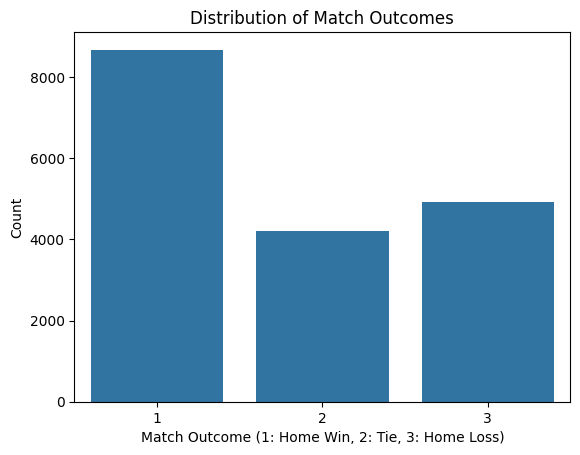


Class Distribution (%):
 status
1    48.697507
3    27.661127
2    23.641365
Name: proportion, dtype: float64


In [9]:
plt.figure()
sns.countplot(x='status', data=df)
plt.title('Distribution of Match Outcomes')
plt.xlabel('Match Outcome (1: Home Win, 2: Tie, 3: Home Loss)')
plt.ylabel('Count')
plt.show()
class_counts = df['status'].value_counts(normalize=True) * 100
print("\nClass Distribution (%):\n", class_counts)

### Numerical Feature Distributions
This cell plots histograms for numerical features (e.g., differences in matches, goals) to visualize their distributions. The features are selected as per requested, excluding team names and goals to avoid leakage. The `hist()` method creates a grid of histograms, with `figsize` and `bins` controlling size and granularity. This helps identify skewness or outliers that may require normalization.

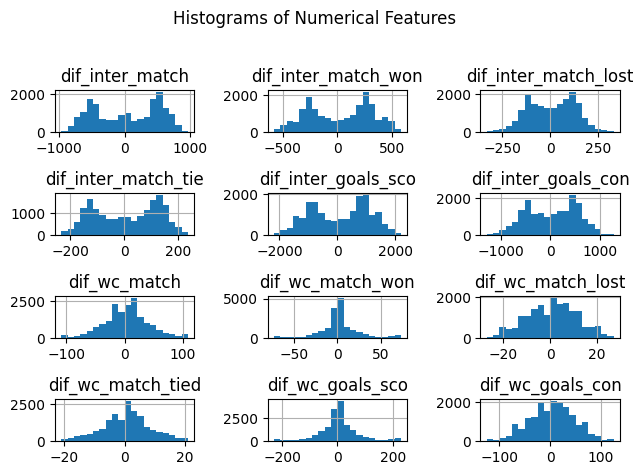

In [11]:
numerical_features = [
    'dif_inter_match', 'dif_inter_match_won', 'dif_inter_match_lost', 
    'dif_inter_match_tie', 'dif_inter_goals_sco', 'dif_inter_goals_con',
    'dif_wc_match', 'dif_wc_match_won', 'dif_wc_match_lost', 
    'dif_wc_match_tied', 'dif_wc_goals_sco', 'dif_wc_goals_con'
]
df[numerical_features].hist(bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Box Plots for Numerical Features
This cell creates box plots for numerical features using `boxplot()` to show their spread, median, and potential outliers. The `figsize` and `xticks(rotation=45)` ensure readability. Outliers may indicate unusual matches or errors, guiding preprocessing decisions like outlier removal or transformation.

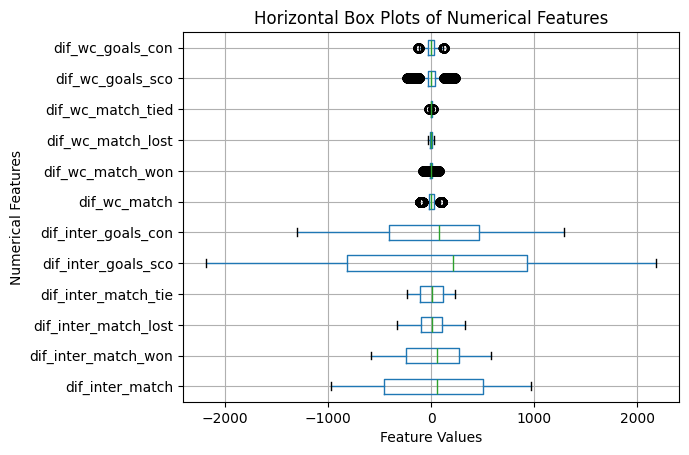

In [16]:
plt.figure()
df[numerical_features].boxplot(vert=False)
plt.title('Horizontal Box Plots of Numerical Features')
plt.yticks(rotation=0)
plt.xlabel('Feature Values')
plt.ylabel('Numerical Features')
plt.show()

### Correlation Analysis
This cell computes the correlation matrix for numerical features using `corr()` and visualizes it as a heatmap with `seaborn.heatmap()`. The `annot=True` displays correlation coefficients, and `cmap='coolwarm'` highlights positive/negative correlations. This identifies relationships between features (e.g., goals scored vs. matches won) and checks for multicollinearity, which could impact model performance.

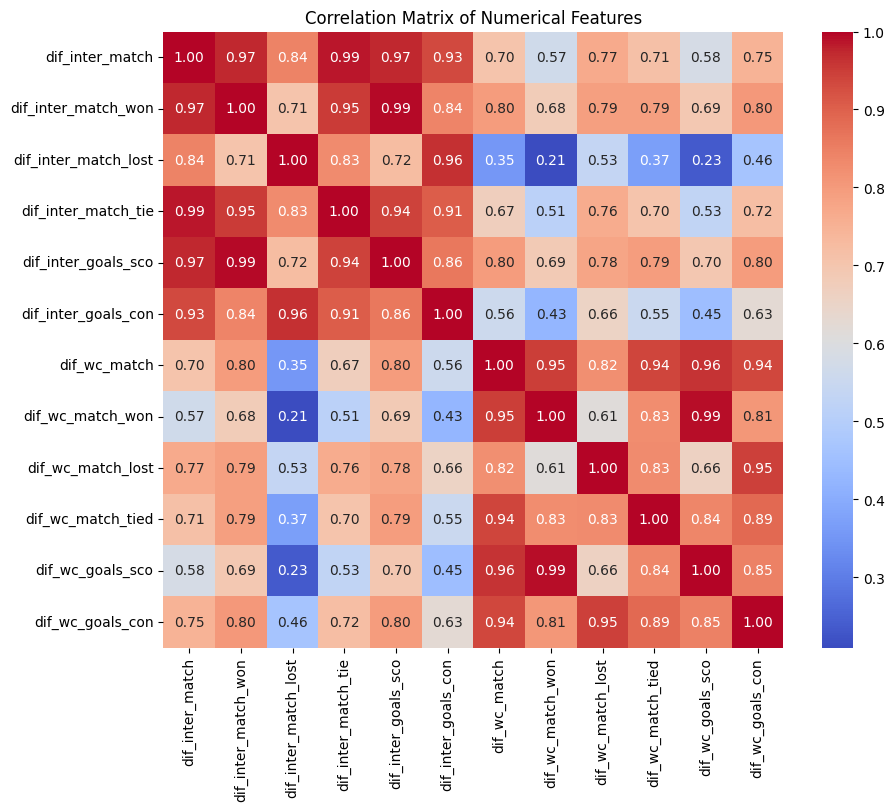

In [18]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Team Performance Analysis
This cell analyzes home vs. away team performance by calculating average goals scored (`mean()`) for `home_goals` and `away_goals`. A kernel density plot (`kdeplot`) compares the distribution of goals, with `fill=True` for visual clarity. This validates logical patterns, such as home teams potentially scoring more due to home advantage, as suggested by the assignment.


Average Home Goals: 1.70
Average Away Goals: 1.14


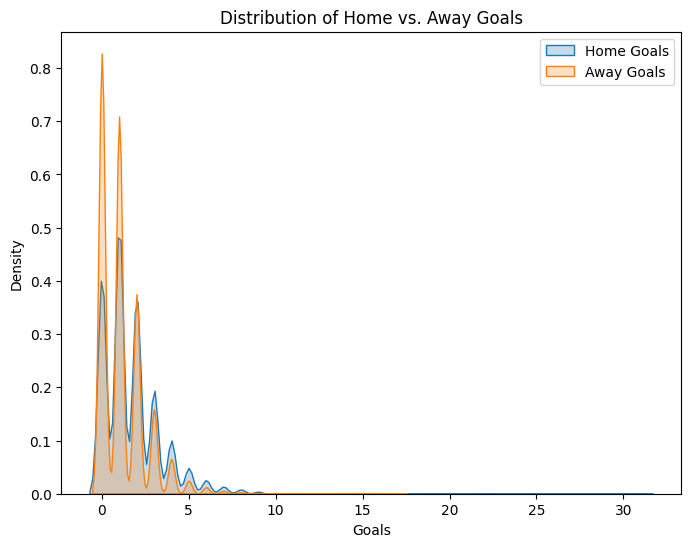

In [19]:
avg_home_goals = df['home_goals'].mean()
avg_away_goals = df['away_goals'].mean()
print(f"\nAverage Home Goals: {avg_home_goals:.2f}")
print(f"Average Away Goals: {avg_away_goals:.2f}")
plt.figure(figsize=(8, 6))
sns.kdeplot(df['home_goals'], label='Home Goals', fill=True)
sns.kdeplot(df['away_goals'], label='Away Goals', fill=True)
plt.title('Distribution of Home vs. Away Goals')
plt.xlabel('Goals')
plt.ylabel('Density')
plt.legend()
plt.show()

### Feature vs. Outcome Analysis
This cell creates box plots for each numerical feature against the `status` column using `sns.boxplot()`. A loop generates one plot per feature, showing how feature values vary across match outcomes (home win, tie, home loss). This helps identify which features (e.g., goal differences) are strongly associated with match results, aiding feature selection.

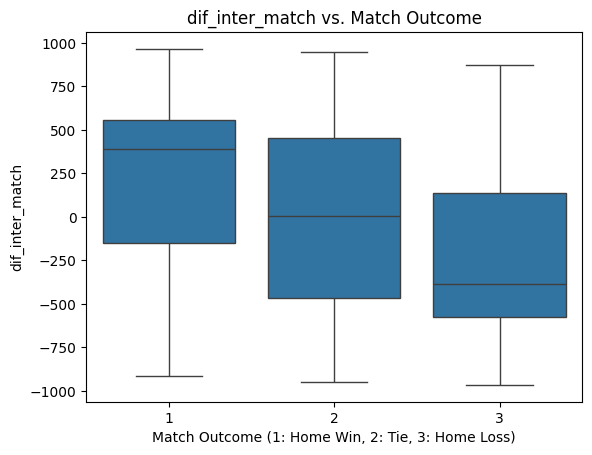

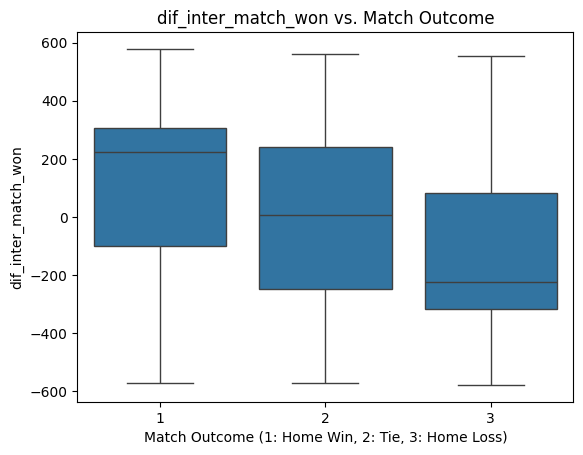

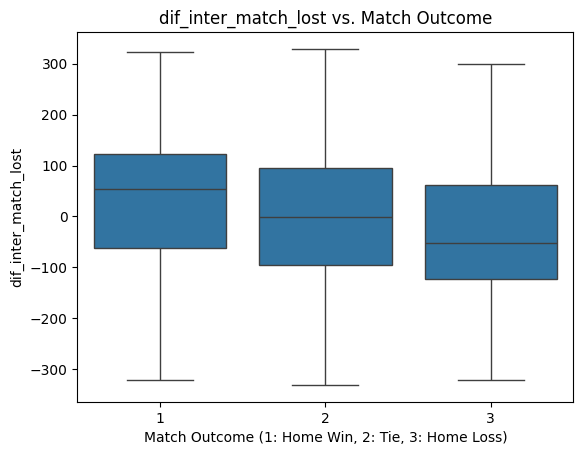

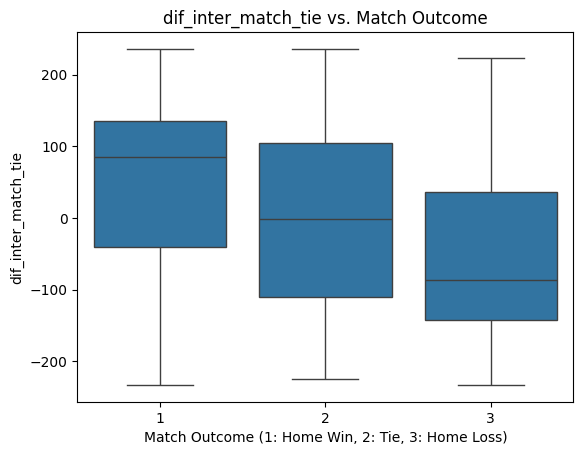

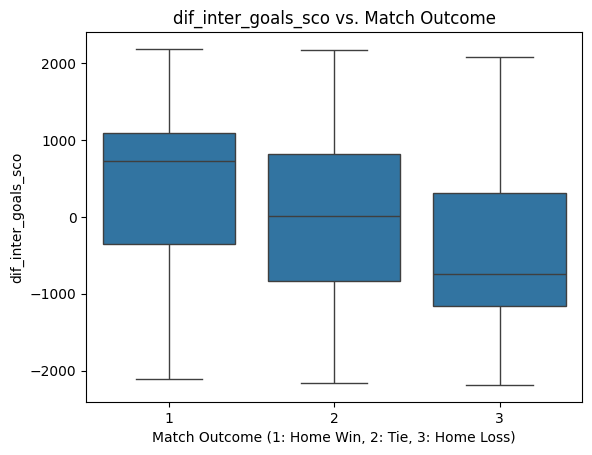

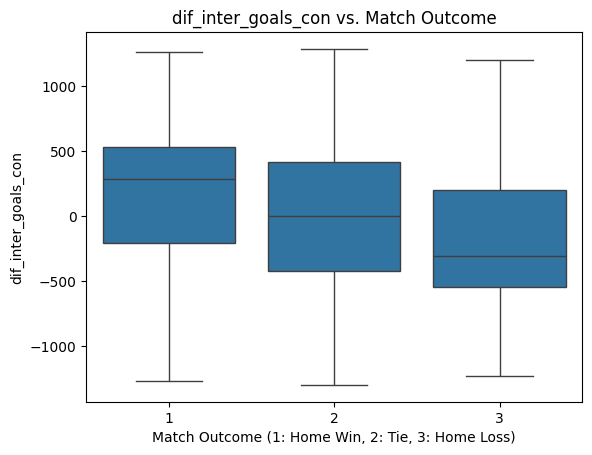

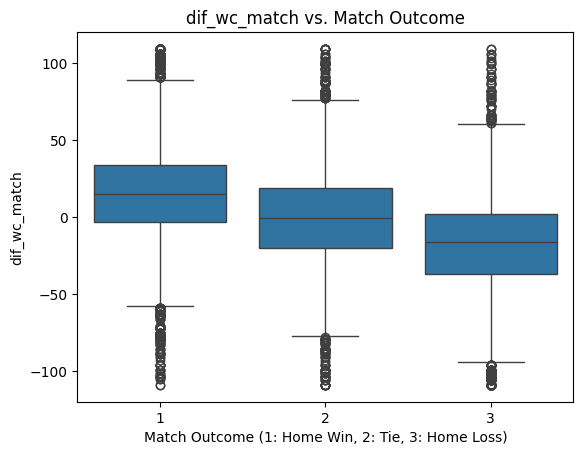

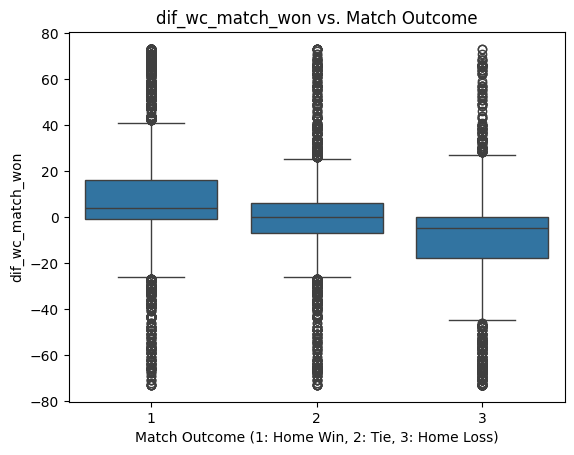

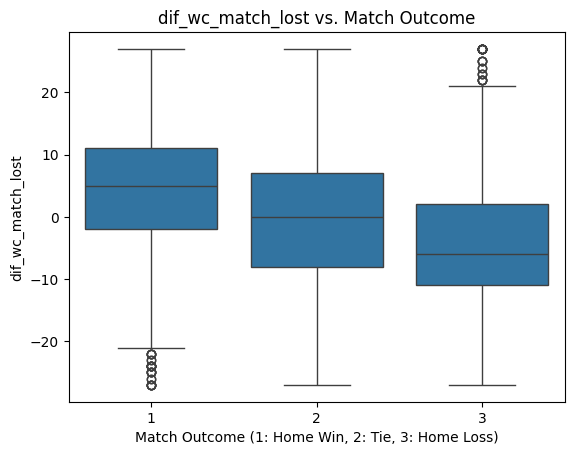

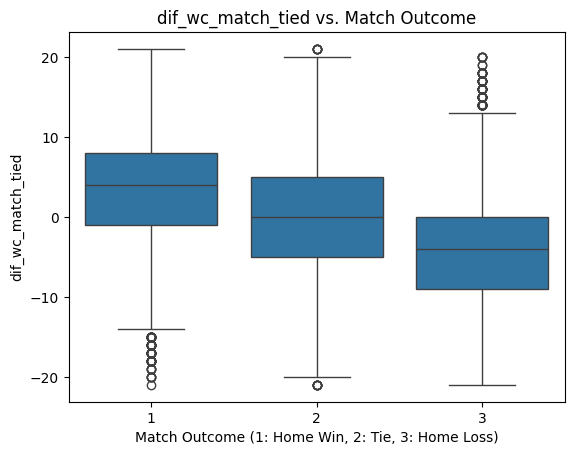

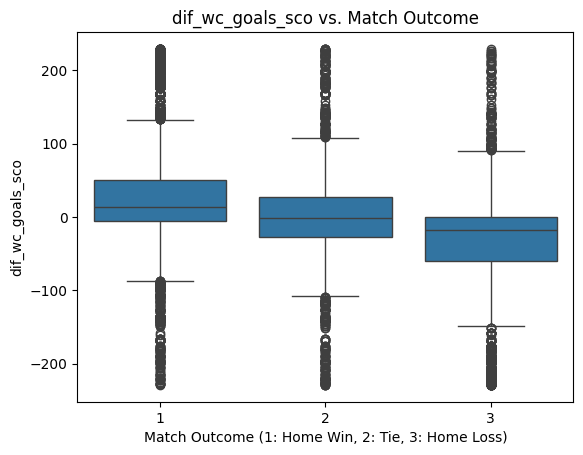

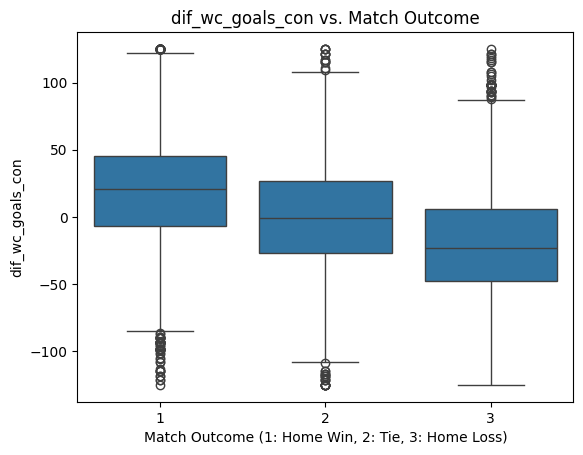

In [20]:
for feature in numerical_features:
    plt.figure()
    sns.boxplot(x='status', y=feature, data=df)
    plt.title(f'{feature} vs. Match Outcome')
    plt.xlabel('Match Outcome (1: Home Win, 2: Tie, 3: Home Loss)')
    plt.ylabel(feature)
    plt.show()

### Validate World Cup Matches
This cell separates World Cup matches (`wcm=1`) from qualifiers (`wcm=0`) and prints their shapes to understand their proportions. A count plot with `hue='wcm'` compares the outcome distribution between World Cup and qualifier matches, ensuring the dataset aligns with the assignment's requirement to train on qualifiers and predict World Cup outcomes.


World Cup Matches Shape: (900, 19)
Qualifier Matches Shape: (16912, 19)


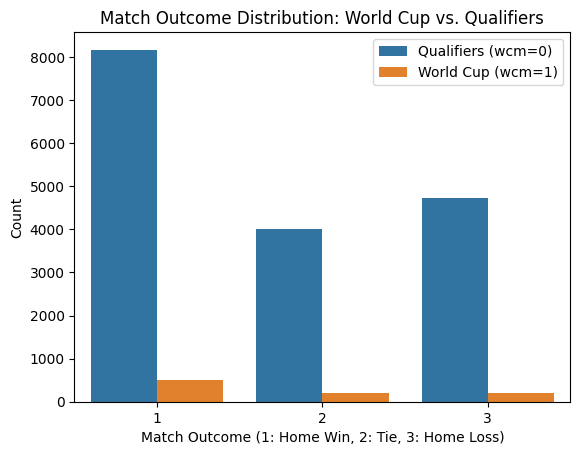

In [21]:
wc_matches = df[df['wcm'] == 1]
qualifier_matches = df[df['wcm'] == 0]
print("\nWorld Cup Matches Shape:", wc_matches.shape)
print("Qualifier Matches Shape:", qualifier_matches.shape)
plt.figure()
sns.countplot(x='status', hue='wcm', data=df)
plt.title('Match Outcome Distribution: World Cup vs. Qualifiers')
plt.xlabel('Match Outcome (1: Home Win, 2: Tie, 3: Home Loss)')
plt.ylabel('Count')
plt.legend(['Qualifiers (wcm=0)', 'World Cup (wcm=1)'])
plt.show()

--- 
## Data Preparation
---

### Load the Dataset
This cell loads the matches.csv file into a pandas DataFrame using pd.read_csv(). The dataset contains football match data, including features like dif_inter_match and the target status. Only qualifier matches (wcm=0) are used for training to keep World Cup matches (wcm=1) unseen, as specified in the assignment.


In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('matches.csv')

# Filter for qualifier matches (wcm=0)
df = df[df['wcm'] == 0]
print("Shape of qualifier matches dataset:", df.shape)

Shape of qualifier matches dataset: (16912, 19)


### Select Features and Target
This cell selects the features (X) and target (y) for the model. The assignment specifies excluding columns home_team, home_goals, away_goals, away_team, and status from X to avoid data leakage and bias toward team names. The status column (1: home win, 2: tie, 3: home loss) is used as the target y. Missing values are dropped to ensure clean data.


In [37]:
# Define columns to exclude
exclude_columns = ['home_team', 'home_goals', 'away_goals', 'away_team', 'status']

# Select features (X) and target (y)
X = df.drop(columns=exclude_columns)
y = df['status']

# Handle missing values by dropping rows
X = X.dropna()
y = y[X.index]  # Align y with X after dropping rows
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (16912, 14)
Shape of y: (16912,)


### Encode Labels
This cell encodes the target variable y (match outcomes: 1, 2, 3) using LabelEncoder from scikit-learn, as suggested in the assignment. Since status is already numerical (1, 2, 3), encoding adjusts it to start from 0 (0, 1, 2) to align with PyTorch’s expectations for multi-class classification, where class indices typically start at 0.


In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Encoded classes:", le.classes_)
print("Sample of encoded y:", y_encoded[:5])
y_encoded

Encoded classes: [1 2 3]
Sample of encoded y: [0 0 0 0 0]


array([0, 0, 0, ..., 2, 0, 2])

### Split Data into Train and Test Sets
This cell splits the dataset into training and test sets with a 30% test portion, as specified in the assignment. The train_test_split function from scikit-learn is used with a random state for reproducibility. The split ensures the model is trained on one portion and evaluated on a separate, unseen portion.


In [34]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (11838, 14) (11838,)
Test set shape (X_test, y_test): (5074, 14) (5074,)


### Standardize Features
This cell standardizes the numerical features using StandardScaler from scikit-learn, as required by the assignment. The scaler is fit only on the training data to avoid data leakage from the test set, ensuring the test data remains unseen. The standardized features have a mean of 0 and a standard deviation of 1, which is necessary for neural network training to ensure all features contribute equally.


In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data only and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

print("Sample of scaled X_train:", X_train_scaled[:5])
print("Mean of scaled X_train:", X_train_scaled.mean(axis=0))
print("Std of scaled X_train:", X_train_scaled.std(axis=0))

Sample of scaled X_train: [[-0.75396445  0.         -1.14415346 -0.80003499 -1.79826171 -1.0609878
  -0.81014721 -1.51762369 -0.10199632 -0.08053151  0.03378748 -0.30121163
  -0.06478831 -0.03379388]
 [-1.44560289  0.          0.93044018  1.02934216  0.71587576  0.69613866
   1.2234781   1.04075062  0.92318957  1.05652216  0.68871915  0.45187576
   1.00011713  0.79160742]
 [-0.67820482  0.         -0.87355429 -0.9182837  -0.59985618 -0.8423979
  -0.874315   -0.69291038 -0.15456995 -0.51785985  0.40803415  0.20084663
  -0.40610416  0.34544456]
 [ 0.71732429  0.          1.64802909  1.4884254   1.69638937  1.61253475
   1.43276382  1.6323502   1.44892593  0.66292666  2.46639085  1.70702142
   0.78167499  2.13009603]
 [ 0.79921004  0.          1.01262215  0.99804103  1.01757226  0.81384091
   1.21163174  1.24643922  0.08201141  0.31306399 -0.52758253  0.20084663
   0.08539066 -0.18995088]]
Mean of scaled X_train: [ 3.48128727e-17  0.00000000e+00  9.60355108e-18  1.74064363e-17
  1.1254161

### Convert to PyTorch Tensors

This cell converts the standardized features (X_train_scaled, X_test_scaled) and encoded labels (y_train, y_test) into PyTorch tensors, as the assignment specifies using PyTorch for model training. The data is now ready to be fed into a neural network, fulfilling the requirement to prepare data for a Multi-Layer Perceptron (MLP).


In [42]:
import torch

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

X_train_tensor shape: torch.Size([11838, 14])
y_train_tensor shape: torch.Size([11838])
X_test_tensor shape: torch.Size([5074, 14])
y_test_tensor shape: torch.Size([5074])


### Define the MLP Model
This cell defines a PyTorch MLP model for predicting football match outcomes (home win, tie, home loss). The architecture consists of three fully connected layers with ReLU activations and dropout for regularization, designed to handle the numerical features from the dataset. The input size is determined by the number of features in X_train_tensor, and the output size is 3 (for the three classes).


In [44]:
import torch
import torch.nn as nn

class FootballMLP(nn.Module):
    def __init__(self, input_size, hidden_size1=64, hidden_size2=32, output_size=3, dropout_rate=0.3):
        super(FootballMLP, self).__init__()
        # First fully connected layer
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        # Second fully connected layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        # Output layer
        self.fc3 = nn.Linear(hidden_size2, output_size)
        
    def forward(self, x):
        # Forward pass through the network
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

### Set Up Training Components
This cell sets up the essential components for training the MLP model. It defines the loss function (CrossEntropyLoss) for multi-class classification, as recommended by the assignment. An Adam optimizer is chosen for its efficiency, with the model’s parameters and a learning rate. The training data (X_train_tensor, y_train_tensor) from the Data Preparation section is used, along with a DataLoader to handle batching.


In [49]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# Assuming FootballMLP is defined as in the Model Definition section
# and X_train_tensor, y_train_tensor are from Data Preparation
model = FootballMLP(input_size=X_train_tensor.shape[1])

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Create DataLoader for batching
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

### Training Loop
This cell implements the training loop for the MLP model. The loop runs for a fixed number of epochs (e.g., 50), as suggested by the assignment. For each epoch, it clears the optimizer’s gradient cache using zero_grad(), passes batches of training data through the model, computes the loss, calculates gradients with backward(), and updates model parameters with step(). The average loss per epoch is printed to monitor training progress.


Epoch [1/50], Loss: 1.0265
Epoch [2/50], Loss: 0.9744
Epoch [3/50], Loss: 0.9672
Epoch [4/50], Loss: 0.9648
Epoch [5/50], Loss: 0.9601
Epoch [6/50], Loss: 0.9588
Epoch [7/50], Loss: 0.9602
Epoch [8/50], Loss: 0.9556
Epoch [9/50], Loss: 0.9567
Epoch [10/50], Loss: 0.9580
Epoch [11/50], Loss: 0.9577
Epoch [12/50], Loss: 0.9560
Epoch [13/50], Loss: 0.9529
Epoch [14/50], Loss: 0.9546
Epoch [15/50], Loss: 0.9530
Epoch [16/50], Loss: 0.9520
Epoch [17/50], Loss: 0.9534
Epoch [18/50], Loss: 0.9503
Epoch [19/50], Loss: 0.9527
Epoch [20/50], Loss: 0.9501
Epoch [21/50], Loss: 0.9529
Epoch [22/50], Loss: 0.9486
Epoch [23/50], Loss: 0.9501
Epoch [24/50], Loss: 0.9489
Epoch [25/50], Loss: 0.9498
Epoch [26/50], Loss: 0.9483
Epoch [27/50], Loss: 0.9471
Epoch [28/50], Loss: 0.9475
Epoch [29/50], Loss: 0.9507
Epoch [30/50], Loss: 0.9489
Epoch [31/50], Loss: 0.9482
Epoch [32/50], Loss: 0.9483
Epoch [33/50], Loss: 0.9479
Epoch [34/50], Loss: 0.9476
Epoch [35/50], Loss: 0.9466
Epoch [36/50], Loss: 0.9474
E

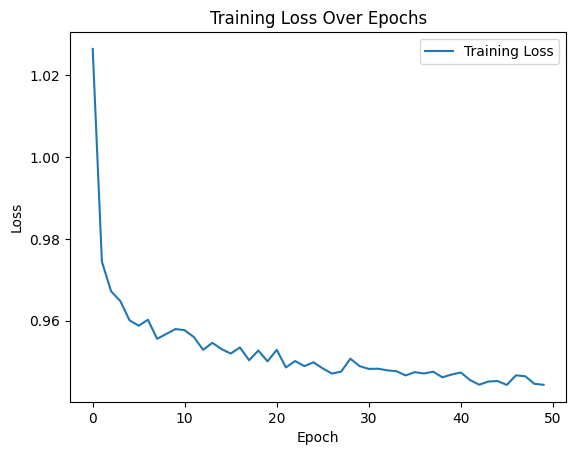

In [50]:
# Set number of epochs
num_epochs = 50

# Lists to track loss
train_losses = []

# Training loop
model.train()  # Set model to training mode
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Track loss
        epoch_loss += loss.item() * batch_X.size(0)
    
    # Average loss for the epoch
    epoch_loss /= len(train_dataset)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Plot training loss
import matplotlib.pyplot as plt
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate Model on Test Set
This cell evaluates the trained MLP model on the test set (X_test_tensor, y_test_tensor) from the Data Preparation section. The model is set to evaluation mode, and predictions are made without gradient computation. Accuracy is calculated as the percentage of correctly predicted match outcomes (home win, tie, home loss).


In [58]:
import torch
import numpy as np

# Set model to evaluation mode
model.eval()

# Disable gradient computation for evaluation
with torch.no_grad():
    # Get predictions on test set
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Get class with highest probability
    correct = (predicted == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = 100 * correct / total

print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 56.15%


### Prepare World Cup Data
This cell prepares the Qatar 2022 World Cup data for prediction. The dataset is filtered for World Cup matches (wcm=1), and the same features used in training (excluding home_team, home_goals, away_goals, away_team, status) are selected. The features are standardized using the same StandardScaler fitted on the training data to avoid leakage. The data is converted to a PyTorch tensor for model input.


In [59]:
# Load full dataset again for World Cup matches
df_full = pd.read_csv('matches.csv')

# Filter for World Cup matches (wcm=1)
wc_df = df_full[df_full['wcm'] == 1]

# Select features (same as training)
exclude_columns = ['home_team', 'home_goals', 'away_goals', 'away_team', 'status']
X_wc = wc_df.drop(columns=exclude_columns)

# Handle missing values (drop rows for simplicity)
X_wc = X_wc.dropna()

# Standardize features using the same scaler from training
X_wc_scaled = scaler.transform(X_wc)

# Convert to PyTorch tensor
X_wc_tensor = torch.tensor(X_wc_scaled, dtype=torch.float32)

print("World Cup data shape:", X_wc_tensor.shape)

World Cup data shape: torch.Size([900, 14])


### Predict World Cup Match Outcomes
This cell uses the trained MLP model to predict outcomes for the Qatar 2022 World Cup matches. The model makes predictions on X_wc_tensor, and the encoded predictions (0, 1, 2) are converted back to original labels (1, 2, 3) using the LabelEncoder from the Data Preparation section. The predictions are stored with team names for further processing in the tournament simulation.


In [61]:
# Predict World Cup match outcomes
model.eval()
with torch.no_grad():
    wc_outputs = model(X_wc_tensor)
    _, wc_predicted = torch.max(wc_outputs, 1)
    wc_predicted = wc_predicted.numpy()

# Convert predictions back to original labels (1, 2, 3)
wc_predicted_original = le.inverse_transform(wc_predicted)

# Create DataFrame with predictions and team names
wc_results = wc_df[['home_team', 'away_team']].copy()
wc_results['predicted_status'] = wc_predicted_original
wc_results['outcome'] = wc_results['predicted_status'].map({1: 'Home Win', 2: 'Tie', 3: 'Home Loss'})

print("Sample World Cup Predictions:")
print(wc_results.head())

Sample World Cup Predictions:
           home_team away_team  predicted_status    outcome
16912         France    Mexico                 1   Home Win
16913  United States   Belgium                 1   Home Win
16914     Yugoslavia    Brazil                 3  Home Loss
16915        Romania      Peru                 1   Home Win
16916      Argentina    France                 1   Home Win


### Simulate FIFA World Cup Tournament
This cell simulates the Qatar 2022 FIFA World Cup tournament using the predicted match outcomes. The simulation follows the real group stage configuration (8 groups, 4 teams each, top 2 advance) and knockout stages (Round of 16, Quarterfinals, Semifinals, Final). Points are awarded based on predictions (3 for a win, 1 for a tie, 0 for a loss), and group rankings determine advancing teams. The knockout stage uses predicted outcomes to determine winners, advancing to the final to predict the champion.


In [62]:
# Define Qatar 2022 group stage configuration (real groups)
groups = {
    'A': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands'],
    'B': ['England', 'Iran', 'USA', 'Wales'],
    'C': ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'],
    'D': ['France', 'Australia', 'Denmark', 'Tunisia'],
    'E': ['Spain', 'Costa Rica', 'Germany', 'Japan'],
    'F': ['Belgium', 'Canada', 'Morocco', 'Croatia'],
    'G': ['Brazil', 'Serbia', 'Switzerland', 'Cameroon'],
    'H': ['Portugal', 'Ghana', 'Uruguay', 'South Korea']
}

# Simulate group stage
def simulate_group_stage(groups, wc_results):
    group_standings = {}
    for group, teams in groups.items():
        # Initialize points for each team
        points = {team: 0 for team in teams}
        for _, row in wc_results.iterrows():
            home_team = row['home_team']
            away_team = row['away_team']
            outcome = row['predicted_status']
            if home_team in teams and away_team in teams:
                if outcome == 1:  # Home win
                    points[home_team] += 3
                elif outcome == 2:  # Tie
                    points[home_team] += 1
                    points[away_team] += 1
                elif outcome == 3:  # Home loss
                    points[away_team] += 3
        # Sort teams by points (descending)
        standings = sorted(points.items(), key=lambda x: x[1], reverse=True)
        group_standings[group] = standings
    return group_standings

# Run group stage simulation
group_standings = simulate_group_stage(groups, wc_results)
print("\nGroup Stage Standings:")
for group, standings in group_standings.items():
    print(f"Group {group}:")
    for team, pts in standings:
        print(f"  {team}: {pts} points")

# Simulate knockout stage
def simulate_knockout_stage(group_standings, wc_results):
    # Get top 2 teams from each group
    round_of_16_teams = []
    for group in group_standings:
        round_of_16_teams.extend([team[0] for team in group_standings[group][:2]])
    
    # Simplified knockout stage (pair top teams, use predictions)
    knockout_matches = [
        (round_of_16_teams[0], round_of_16_teams[3]),  # A1 vs B2
        (round_of_16_teams[2], round_of_16_teams[1]),  # B1 vs A2
        (round_of_16_teams[4], round_of_16_teams[7]),  # C1 vs D2
        (round_of_16_teams[6], round_of_16_teams[5]),  # D1 vs C2
        (round_of_16_teams[8], round_of_16_teams[11]), # E1 vs F2
        (round_of_16_teams[10], round_of_16_teams[9]), # F1 vs E2
        (round_of_16_teams[12], round_of_16_teams[15]),# G1 vs H2
        (round_of_16_teams[14], round_of_16_teams[13]) # H1 vs G2
    ]
    
    # Quarterfinals
    quarterfinals = []
    for match in knockout_matches:
        home_team, away_team = match
        # Find prediction for this match
        match_row = wc_results[(wc_results['home_team'] == home_team) & (wc_results['away_team'] == away_team)]
        if not match_row.empty:
            outcome = match_row['predicted_status'].iloc[0]
            winner = home_team if outcome == 1 else away_team if outcome == 3 else None
            if winner:
                quarterfinals.append(winner)
        else:
            # Fallback: Randomly choose winner if match not found
            winner = np.random.choice([home_team, away_team])
            quarterfinals.append(winner)
    
    # Semifinals
    semifinals = [
        (quarterfinals[0], quarterfinals[1]),
        (quarterfinals[2], quarterfinals[3]),
        (quarterfinals[4], quarterfinals[5]),
        (quarterfinals[6], quarterfinals[7])
    ]
    semifinalists = []
    for match in semifinals:
        home_team, away_team = match
        match_row = wc_results[(wc_results['home_team'] == home_team) & (wc_results['away_team'] == away_team)]
        if not match_row.empty:
            outcome = match_row['predicted_status'].iloc[0]
            winner = home_team if outcome == 1 else away_team if outcome == 3 else None
            if winner:
                semifinalists.append(winner)
        else:
            winner = np.random.choice([home_team, away_team])
            semifinalists.append(winner)
    
    # Final
    final = [(semifinalists[0], semifinalists[1]), (semifinalists[2], semifinalists[3])]
    finalists = []
    for match in final:
        home_team, away_team = match
        match_row = wc_results[(wc_results['home_team'] == home_team) & (wc_results['away_team'] == away_team)]
        if not match_row.empty:
            outcome = match_row['predicted_status'].iloc[0]
            winner = home_team if outcome == 1 else away_team if outcome == 3 else None
            if winner:
                finalists.append(winner)
        else:
            winner = np.random.choice([home_team, away_team])
            finalists.append(winner)
    
    # Champion
    champion_match = (finalists[0], finalists[1])
    home_team, away_team = champion_match
    match_row = wc_results[(wc_results['home_team'] == home_team) & (wc_results['away_team'] == away_team)]
    if not match_row.empty:
        outcome = match_row['predicted_status'].iloc[0]
        champion = home_team if outcome == 1 else away_team if outcome == 3 else np.random.choice([home_team, away_team])
    else:
        champion = np.random.choice([home_team, away_team])
    
    return champion

# Run knockout stage simulation
champion = simulate_knockout_stage(group_standings, wc_results)
print(f"\nPredicted World Cup Champion: {champion}")


Group Stage Standings:
Group A:
  Qatar: 0 points
  Ecuador: 0 points
  Senegal: 0 points
  Netherlands: 0 points
Group B:
  England: 0 points
  Iran: 0 points
  USA: 0 points
  Wales: 0 points
Group C:
  Argentina: 15 points
  Mexico: 3 points
  Saudi Arabia: 0 points
  Poland: 0 points
Group D:
  France: 12 points
  Denmark: 3 points
  Australia: 0 points
  Tunisia: 0 points
Group E:
  Germany: 15 points
  Spain: 0 points
  Costa Rica: 0 points
  Japan: 0 points
Group F:
  Belgium: 3 points
  Canada: 0 points
  Morocco: 0 points
  Croatia: 0 points
Group G:
  Brazil: 15 points
  Switzerland: 3 points
  Serbia: 0 points
  Cameroon: 0 points
Group H:
  Uruguay: 9 points
  South Korea: 6 points
  Portugal: 3 points
  Ghana: 0 points

Predicted World Cup Champion: Germany
